![Logo Chanel](https://puls-img.chanel.com/c_limit,w_960/q_auto:good,dpr_auto,f_auto/1676976259247-8843363975198visuelboutiquedesktopsabhubjpg_900x2880.jpg)

# Projet 1 : Chanel

### Plan du projet - Prédiction des prix des produits Chanel Singapour

#### 1. Introduction
##### Contexte

Chanel, fondée en 1910 par Coco Chanel, est une maison française de luxe reconnue pour sa haute couture, son prêt-à-porter, ses accessoires et ses parfums. Dirigée par Leena Nair depuis 2022, l’entreprise privée détenue par les frères Wertheimer réalise un chiffre d’affaires de 18,7 milliards de dollars en 2024 et emploie environ 37 000 personnes dans le monde.

Dans le luxe, la fixation des prix reflète l’image de la marque et la perception des consommateurs : chaque produit Chanel est une œuvre d’art, et son prix doit en témoigner.

Chanel est également présente à l’international, et Singapour constitue un marché clé en Asie pour la marque. La ville-État accueille plusieurs boutiques Chanel proposant l’ensemble des gammes, du prêt-à-porter aux accessoires et parfums. Les prix à Singapour reflètent à la fois les standards du luxe international et les particularités du marché local.

Singapour est un marché clé pour le luxe en Asie, avec une forte demande pour la mode, les accessoires et la beauté. La ville attire de nombreux consommateurs fortunés et touristes, et offre un environnement stable et stratégique pour les marques internationales comme Chanel. Les achats combinent boutiques physiques et plateformes en ligne, reflétant les tendances modernes du marché du luxe.


##### Objectif du projet

L’objectif de ce projet est de prédire le prix des produits Chanel en fonction de leurs caractéristiques, telles que la catégorie (bijoux, mode, parfum…), le type de produit ou d’autres attributs disponibles dans le dataset.

Cette analyse permettra de mieux comprendre les facteurs qui influencent le prix et de créer un modèle de régression linéaire capable d’estimer la valeur d’un produit avec un niveau de précision raisonnable.

##### Dataset

Le dataset utilisé provient de Hugging Face et contient 971 produits Chanel vendus à Singapour. Il inclut des informations détaillées sur chaque produit, telles que :

- brand : marque (Chanel)

- category1_code, category2_code, category3_code : catégories des produits (ex. Fashion, Jewelry, Handbags…)

- product_code et title : identifiants et nom du produit

- price, full_price : prix actuel et prix initial

- currency_code : devise (SGD pour dollar de Singapour)

- itemurl, imageurl : liens vers le produit et l’image

- flg_discount : indicateur de remise

Ce dataset permet de prédire le prix des produits en fonction de leurs caractéristiques principales (catégorie, type, matériaux, etc.) et de tester un modèle de régression linéaire.

- **Problématique** : 
> Comment prédire de manière fiable le prix d’un produit Chanel (bijoux, mode, parfum, accessoires…) en utilisant ses caractéristiques principales, telles que la catégorie, le type de produit ou d’autres attributs disponibles dans le dataset ?

Cette question guide le projet et permet de structurer l’analyse, le prétraitement des données et la modélisation avec la régression linéaire.

In [279]:
# INSTALLATION

# !pip install pandas
# !pip install pyarrow
# !pip install fastparquet
# !pip install datasets
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

In [280]:
from datasets import load_dataset
import pandas as pd

# Charger depuis Hugging Face
ds = load_dataset("DBQ/Chanel.Product.prices.Singapore", split="train")

# Convertir en DataFrame pandas
datas = ds.to_pandas()

#### 2. Analyse exploratoire des données (EDA)
- **Compréhension des données** : 
    - Types de variables (numériques, catégorielles).
    - Valeurs manquantes, doublons.

- **Statistiques descriptives** : Moyenne, médiane, distribution des prix par catégorie de produit.

- Visualisations :
    - Histogramme des prix.
    - Boîtes à moustaches par catégorie.
    - Corrélation entre les caractéristiques et le prix.


In [281]:
# Apercu des premieres lignes
print(datas.head())

# Types de variables
print(datas.dtypes)

# Valeurs manquantes
print(datas.isnull().sum())

# Doublons
print(datas.duplicated().sum())

  website_name competence_date country_code currency_code   brand  \
0       Chanel      2023-11-17          SGP           SGD  CHANEL   
1       Chanel      2023-11-17          SGP           SGD  CHANEL   
2       Chanel      2023-11-17          SGP           SGD  CHANEL   
3       Chanel      2023-11-17          SGP           SGD  CHANEL   
4       Chanel      2023-11-17          SGP           SGD  CHANEL   

  category1_code            category2_code category3_code   product_code  \
0        FASHION             READY-TO-WEAR           N.A.  PP75211V66913   
1        FASHION             READY-TO-WEAR           N.A.  PP75222V67022   
2        FASHION             READY-TO-WEAR           N.A.  PP75251V66859   
3        FASHION             READY-TO-WEAR           N.A.  PP75254C66790   
4        JEWELRY  SOUS LE SIGNE DU LION HJ           N.A.        PJ60428   

                             title  \
0                Silk Crepe  Black   
1  Tweed & Imitation Pearls  Black   
2      Printed

In [282]:
print(datas.isnull().sum())

website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     1
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64


In [283]:
print(datas.dtypes)

website_name        object
competence_date     object
country_code        object
currency_code       object
brand               object
category1_code      object
category2_code      object
category3_code      object
product_code        object
title               object
itemurl             object
imageurl            object
full_price         float64
price              float64
full_price_eur     float64
price_eur          float64
flg_discount         int64
dtype: object


In [284]:
from IPython.display import display

# Affichage interactif du tableau
display(datas.head(10))


,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
0,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75211V66913,Silk Crepe Black,https://www.chanel.com/sg/fashion/p/P75211V669...,https://res.cloudinary.com/dwayrkp5z/image/fet...,8110.0,8110.0,5543.40,5543.40,0
1,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75222V67022,Tweed & Imitation Pearls Black,https://www.chanel.com/sg/fashion/p/P75222V670...,https://res.cloudinary.com/dwayrkp5z/image/fet...,14940.0,14940.0,10211.89,10211.89,0
2,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75251V66859,Printed Denim Blue & White,https://www.chanel.com/sg/fashion/p/P75251V668...,https://res.cloudinary.com/dwayrkp5z/image/fet...,3150.0,3150.0,2153.11,2153.11,0
3,Chanel,2023-11-17,SGP,SGD,CHANEL,FASHION,READY-TO-WEAR,N.A.,PP75254C66790,Calfskin & Coated Lace Black,https://www.chanel.com/sg/fashion/p/P75254C667...,https://res.cloudinary.com/dwayrkp5z/image/fet...,18760.0,18760.0,12822.96,12822.96,0
4,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,SOUS LE SIGNE DU LION HJ,N.A.,PJ60428,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J60...,https://res.cloudinary.com/dwayrkp5z/image/fet...,83400.0,83400.0,57006.15,57006.15,0
5,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,EARRINGS,N.A.,PJ62679,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,75400.0,75400.0,51537.93,51537.93,0
6,Chanel,2023-11-17,SGP,SGD,CHANEL,JEWELRY,L'ESPRIT DU LION,N.A.,PJ62826,18K white gold diamonds,https://www.chanel.com/sg/fine-jewellery/p/J62...,https://res.cloudinary.com/dwayrkp5z/image/fet...,99300.0,99300.0,67874.23,67874.23,0
7,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP102440,LES EAUX DE CHANEL – EAU DE TOILETTE SPRAY,https://www.chanel.com/sg/fragrance/p/102440/p...,https://res.cloudinary.com/dwayrkp5z/image/fet...,226.0,226.0,154.47,154.47,0
8,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP107120,PARFUM TWIST AND SPRAY,https://www.chanel.com/sg/fragrance/p/107120/b...,https://res.cloudinary.com/dwayrkp5z/image/fet...,210.0,210.0,143.54,143.54,0
9,Chanel,2023-11-17,SGP,SGD,CHANEL,FRAGRANCE,MEN,N.A.,PP107580,3-IN-1 MOISTURIZER,https://www.chanel.com/sg/fragrance/p/107580/b...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,92.0,62.88,62.88,0


In [285]:
# Statistiques descriptives pour les variables numériques
print(datas[['price', 'full_price']].describe())

# Prix moyen et médian par catégorie principale
prix_par_categorie = datas.groupby('category1_code')['price'].agg(['mean', 'median'])
print(prix_par_categorie)


               price     full_price
count     971.000000     971.000000
mean    11037.121164   11037.121164
std     27062.131936   27062.131936
min        28.000000      28.000000
25%       211.000000     211.000000
50%      1580.000000    1580.000000
75%     10020.000000   10020.000000
max    227600.000000  227600.000000
                        mean   median
category1_code                       
EYEWEAR           831.458173    720.0
FASHION          6577.500000   5155.0
FRAGRANCE         236.677019    201.0
JEWELRY         32691.450777  13650.0
MAKEUP             77.920792     67.0
SKINCARE          229.145833    148.0
WATCHES         29230.208333  13525.0


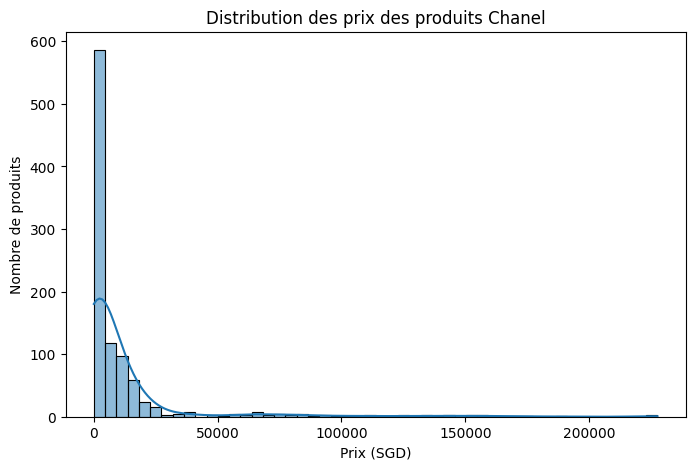

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(datas['price'], bins=50, kde=True)
plt.title("Distribution des prix des produits Chanel")
plt.xlabel("Prix (SGD)")
plt.ylabel("Nombre de produits")
plt.show()


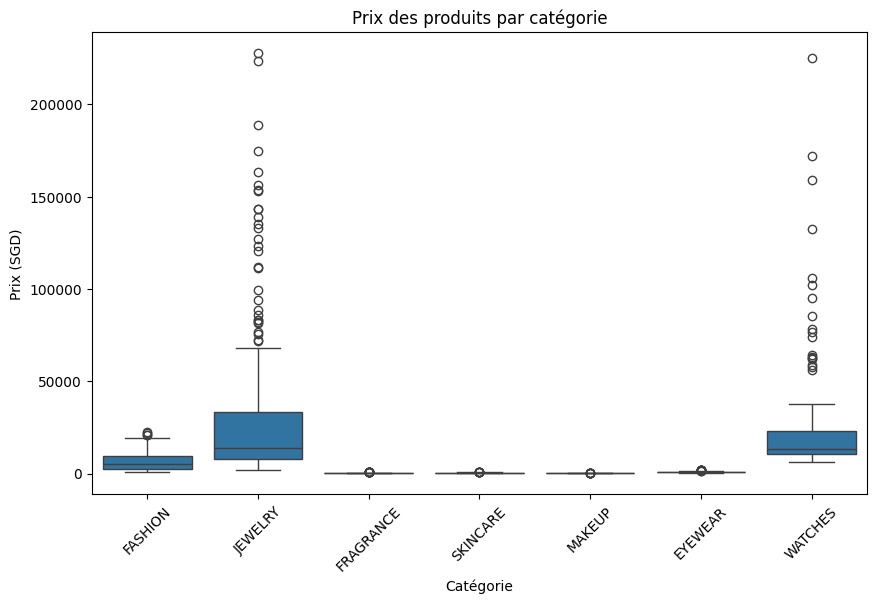

In [287]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category1_code', y='price', data=datas)
plt.title("Prix des produits par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Prix (SGD)")
plt.xticks(rotation=45)
plt.show()


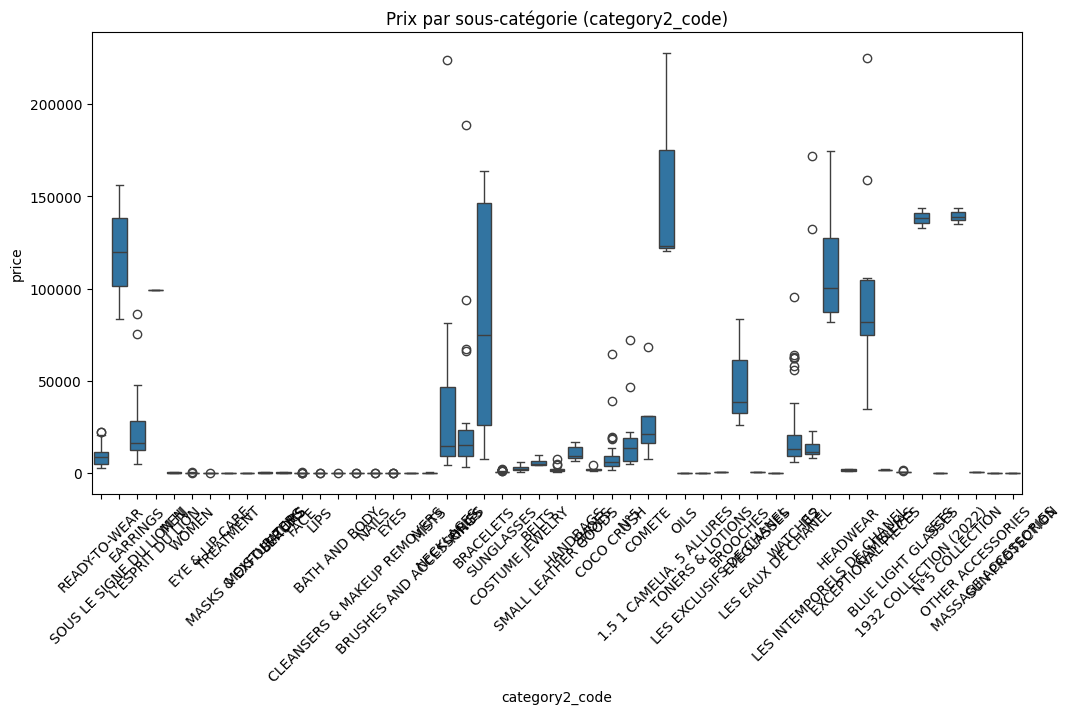

In [288]:
plt.figure(figsize=(12,6))
sns.boxplot(x='category2_code', y='price', data=datas)
plt.title("Prix par sous-catégorie (category2_code)")
plt.xticks(rotation=45)
plt.show()

In [289]:
# Nombre de produits par sous-catégorie
print(datas['category1_code'].value_counts())


category1_code
FASHION      220
JEWELRY      193
FRAGRANCE    161
EYEWEAR      104
MAKEUP       101
SKINCARE      96
WATCHES       96
Name: count, dtype: int64


In [290]:
# Nombre de produits par sous-catégorie
print(datas['category2_code'].value_counts())


category2_code
READY-TO-WEAR                  99
SUNGLASSES                     82
WOMEN                          65
MEN                            62
COSTUME JEWELRY                61
WATCHES                        60
COCO CRUSH                     56
FACE                           43
RINGS                          35
BATH AND BODY                  32
MOISTURIZERS                   31
NECKLACES                      30
HANDBAGS                       28
EYES                           27
J12                            26
EARRINGS                       24
BLUE LIGHT GLASSES             21
BRUSHES AND ACCESSORIES        19
N°5                            15
SMALL LEATHER GOODS            14
LIPS                           14
SERUMS                         11
TONERS & LOTIONS               10
EXCEPTIONAL PIECES             10
BRACELETS                      10
CLEANSERS & MAKEUP REMOVERS    10
SHOES                           9
NAILS                           7
MASKS & EXFOLIATORS             7

In [291]:
# Moyenne et médiane des prix par category2_code
prix_par_sous_categorie = datas.groupby('category1_code')['price'].agg(['mean', 'median'])
print(prix_par_sous_categorie)


                        mean   median
category1_code                       
EYEWEAR           831.458173    720.0
FASHION          6577.500000   5155.0
FRAGRANCE         236.677019    201.0
JEWELRY         32691.450777  13650.0
MAKEUP             77.920792     67.0
SKINCARE          229.145833    148.0
WATCHES         29230.208333  13525.0


In [292]:
# Moyenne et médiane des prix par category2_code
prix_par_sous_categorie = datas.groupby('category2_code')['price'].agg(['mean', 'median'])
print(prix_par_sous_categorie)


                                      mean    median
category2_code                                      
1.5 1 CAMELIA. 5 ALLURES     157033.333333  123100.0
1932 COLLECTION (2022)       138300.000000  138300.0
BATH AND BODY                    95.562500      92.5
BELTS                          5982.500000    4980.0
BLUE LIGHT GLASSES              746.983810     680.0
BRACELETS                     83290.000000   75050.0
BROOCHES                      49350.000000   38750.0
BRUSHES AND ACCESSORIES          73.894737      85.0
CAMELLIAS                      1765.000000    1765.0
CLEANSERS & MAKEUP REMOVERS      83.800000      73.5
COCO CRUSH                     8733.928571    5900.0
COMETE                        28910.000000   21450.0
COSTUME JEWELRY                2750.655738    2370.0
EARRINGS                      24287.500000   16575.0
EXCEPTIONAL PIECES            99930.000000   81650.0
EYE & LIP CARE                  143.800000     107.0
EYEGLASSES                      480.000000    

            price  full_price
price         1.0         1.0
full_price    1.0         1.0


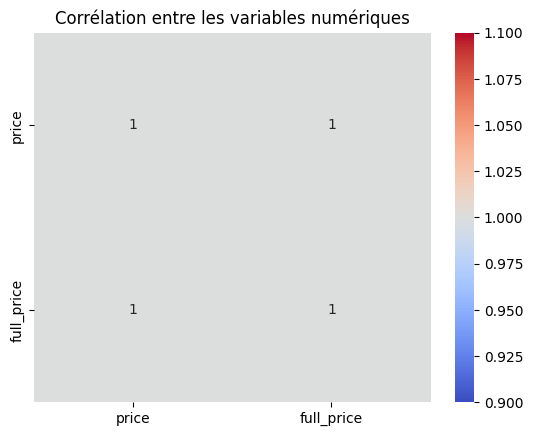

In [293]:
corr = datas[['price', 'full_price']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Corrélation entre les variables numériques")
plt.show()


**Remarques après EDA** : 
Les prix des produits Chanel à Singapour varient fortement selon la catégorie :

- JEWELRY (~32 700 SGD / 23 900 USD) et WATCHES (~29 200 SGD / 21 300 USD) sont les plus chers.

- FASHION (~6 600 SGD / 4 800 USD) est intermédiaire.

- FRAGRANCE, MAKEUP, SKINCARE < 250 SGD (~180 USD) sont beaucoup plus abordables.

Les sous-catégories spécifiques ou éditions limitées expliquent les valeurs extrêmes.
Pour la régression linéaire, la catégorie principale est essentielle, les sous-catégories peuvent être encodées si elles sont fréquentes, et un log-transform du prix est conseillé pour réduire l’effet des outliers.

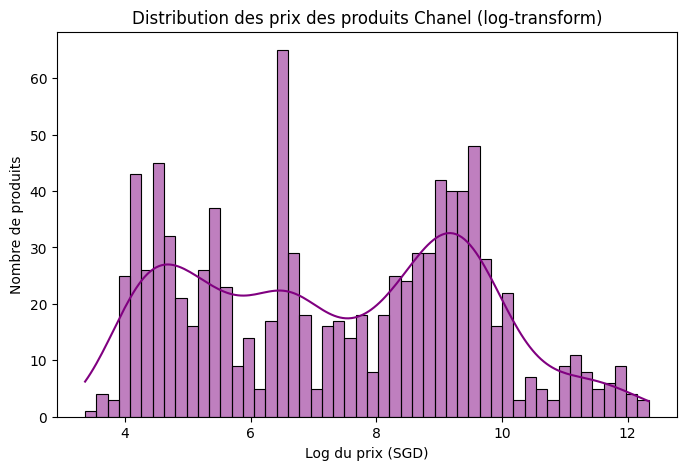

In [294]:
import numpy as np

# Log-transform pour mieux voir les valeurs extrêmes
prices_log = np.log1p(datas['price'])

plt.figure(figsize=(8,5))
sns.histplot(prices_log, bins=50, kde=True, color='purple')
plt.title("Distribution des prix des produits Chanel (log-transform)")
plt.xlabel("Log du prix (SGD)")
plt.ylabel("Nombre de produits")
plt.show()

-----------

#### 3. Prétraitement des données 


- **Nettoyage des données**: Suppression des doublons, gestion des valeurs manquantes.

je remarque que Category2_code a 1 valeur manquante
et Category3_code est remplis de N.A. 
De plus, les autres colonnes ne son pas pertinentes et enfin il faut séparer le y car c'est ce qu'on va predire

In [295]:
datas['category2_code'] = datas['category2_code'].fillna('Other')
print(datas.isnull().sum())


website_name       0
competence_date    0
country_code       0
currency_code      0
brand              0
category1_code     0
category2_code     0
category3_code     0
product_code       0
title              0
itemurl            0
imageurl           0
full_price         0
price              0
full_price_eur     0
price_eur          0
flg_discount       0
dtype: int64


In [296]:
datas = datas.drop_duplicates()

print(datas.duplicated().sum())

0


In [297]:
# Les features (X) non pertinents

X = datas.drop(columns=['price', 'price_eur','category3_code','country_code', 'currency_code', 'full_price', 
                            'full_price_eur', 'competence_date', 'brand', 'product_code',
                            'title', 'itemurl', 'imageurl', 'flg_discount',
                            'website_name'])


# Apercu des premieres lignes
display(X.head())

,category1_code,category2_code
0,FASHION,READY-TO-WEAR
1,FASHION,READY-TO-WEAR
2,FASHION,READY-TO-WEAR
3,FASHION,READY-TO-WEAR
4,JEWELRY,SOUS LE SIGNE DU LION HJ


In [298]:
# On isole nos Y

# Cible
y_sgd = datas['price'] 
y_eur = datas['price_eur']

display(y_eur.head())
display(y_sgd.head())

0     5543.40
1    10211.89
2     2153.11
3    12822.96
4    57006.15
Name: price_eur, dtype: float64

0     8110.0
1    14940.0
2     3150.0
3    18760.0
4    83400.0
Name: price, dtype: float64

- Encodage des variables catégorielles : Exemple : One-Hot Encoding pour la catégorie (bijoux, mode, parfum…).

on crée des features dérivées afin d'affiner la prédiction de prix. En effet, je remarque que certains features pourrais influer sur le prix. Je part du principe que j'ai les éléments technique sur certain produit de ce dataset.

Grâce à la moyenne et le median, on peux voir que le prix est souvent plus élevé lorsqu'on parle d'un bijoux (Jewelry), ou une montre (watches). Et en creusant un peux plus dans category2_code qui donne un peux plus d'information sur ce qu'est l'article, on remarque ainsi qu'il y a des collections de chez Chanel. Or nous savons que dans l'industrie du luxe, lorsqu'il y a des collections ou des éditions limités, le prix est parfois élevé car ca donne une exclusivité au client et ainsi peu de personne peux y avoir accès.

C'est pourquoi je décide de faire du features engineering dans mon projet et je crée des features dérivées `is_high_end` qui regroupera **Jewelry** et **watches**. `is_beauty` qui regroupe la **skincare**, **makeup**, **fragrance** les objets qui sont propre à la beauté.`is_fashion` pour **fashion** et `is_eyewear` pour **eyewear** 

j'ai hésité à rassembler **fashion** et **eyewear** car on peux partir du principe que les lunettes sont des vêtements mais finalement en y repensant clairement c'est mieu de separer

In [299]:
# Copier X pour ajouter les features dérivées
X_fe = X.copy()

# High-end products : JEWELRY + WATCHES
X_fe['is_high_end'] = X_fe['category1_code'].apply(lambda x: 1 if x in ['JEWELRY', 'WATCHES'] else 0)

# Beauty products : SKINCARE + MAKEUP + FRAGRANCE
X_fe['is_beauty'] = X_fe['category1_code'].apply(lambda x: 1 if x in ['SKINCARE', 'MAKEUP', 'FRAGRANCE'] else 0)

# Fashion : FASHION
X_fe['is_fashion'] = X_fe['category1_code'].apply(lambda x: 1 if x == 'FASHION' else 0)

# Eyewear : EYEWEAR
X_fe['is_eyewear'] = X_fe['category1_code'].apply(lambda x: 1 if x == 'EYEWEAR' else 0)

# Vérifier
display(X_fe.head())

,category1_code,category2_code,is_high_end,is_beauty,is_fashion,is_eyewear
0,FASHION,READY-TO-WEAR,0,0,1,0
1,FASHION,READY-TO-WEAR,0,0,1,0
2,FASHION,READY-TO-WEAR,0,0,1,0
3,FASHION,READY-TO-WEAR,0,0,1,0
4,JEWELRY,SOUS LE SIGNE DU LION HJ,1,0,0,0


In [300]:
X_fe = X_fe.dropna(subset=['category2_code'])

Pour simplifier et mieux capturer la hiérarchie, j’ai créé une variable `luxury_level` pour `category2_code` avec trois niveaux **(Standard, standard, High)**.
Cela réduit la complexité, met en avant le positionnement luxe des produits et aide le modèle à mieux expliquer la variance des prix.

In [301]:
# Dictionnaire de mapping
luxury_mapping = {
    # Standard
    'WOMEN': 'standard',
    'MEN': 'standard', 
    'FACE': 'standard', 
    'EYES': 'standard',
    'LIPS': 'standard', 
    'EYE & LIP CARE': 'standard', 
    'MASKS & EXFOLIATORS': 'standard',
    'MOISTURIZERS': 'standard', 
    'SERUMS': 'standard', 
    'CLEANSERS & MAKEUP REMOVERS': 'standard',
    'TONERS & LOTIONS': 'standard', 
    'SUN PROTECTION': 'standard', 
    'BATH AND BODY': 'standard',
    'BRUSHES AND ACCESSORIES': 'standard', 
    'NAILS': 'standard', 
    'OILS': 'standard',
    'MISTS': 'standard', 
    'MASSAGE ACCESSORIES': 'standard', 
    'SETS': 'standard',
    'READY-TO-WEAR': 'standard', 
    'SHOES': 'standard', 
    'HANDBAGS': 'standard', 
    'SMALL LEATHER GOODS': 'standard',
    'BELTS': 'standard', 
    'SUNGLASSES': 'standard', 
    'BLUE LIGHT GLASSES': 'standard', 
    'EYEGLASSES': 'standard',
    'HEADWEAR': 'standard', 
    'OTHER ACCESSORIES': 'standard', 
    'COSTUME JEWELRY': 'standard', 
    'CAMELLIAS': 'standard',
    'BROOCHES': 'standard', 
    'NECKLACES': 'standard', 
    'RINGS': 'standard', 
    'BRACELETS': 'standard', 
    'EARRINGS': 'standard',
    'WATCHES': 'standard' ,
    'N°5': 'standard', 
    'LES EAUX DE CHANEL': 'standard',

    # High
    'J12': 'high', 
    'COCO CRUSH': 'high', 
    'COMETE': 'high',
    '1.5 1 CAMELIA. 5 ALLURES': 'high', 
    "L'ESPRIT DU LION": 'high', 
    'SOUS LE SIGNE DU LION HJ': 'high',
    'EXCEPTIONAL PIECES': 'high', 
    '1932 COLLECTION (2022)': 'high', 
    'LES EXCLUSIFS DE CHANEL': 'high',
    'LES INTEMPORELS DE CHANEL': 'high', 
    'N°5 COLLECTION': 'high'
}

# Ajouter la nouvelle colonne
X_fe['luxury_level'] = X_fe['category2_code'].map(luxury_mapping)
X_fe['luxury_level'] = X_fe['category2_code'].map(luxury_mapping).fillna('standard')



In [302]:
# Vérifier les premières lignes avec la nouvelle colonne
display(X_fe[['category2_code', 'luxury_level']].head(20))


# Vérifier le nombre de produits par niveau de luxe
display(X_fe['luxury_level'].value_counts())


,category2_code,luxury_level
0,READY-TO-WEAR,standard
1,READY-TO-WEAR,standard
2,READY-TO-WEAR,standard
3,READY-TO-WEAR,standard
4,SOUS LE SIGNE DU LION HJ,high
5,EARRINGS,standard
6,L'ESPRIT DU LION,high
7,MEN,standard
8,MEN,standard
9,MEN,standard


luxury_level
standard    858
high        113
Name: count, dtype: int64

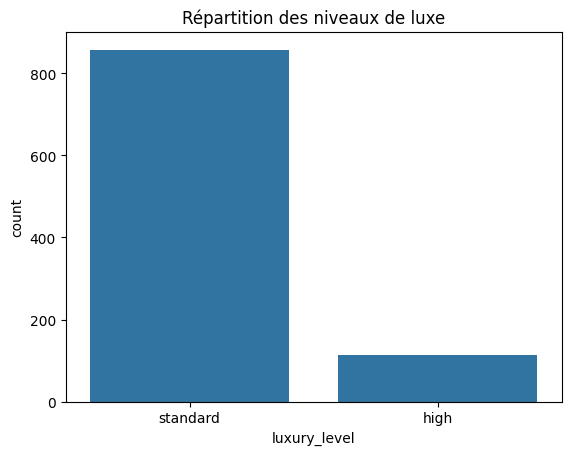

In [303]:
sns.countplot(data=X_fe, x='luxury_level', order=['standard', 'high'])
plt.title("Répartition des niveaux de luxe")
plt.show()

- Feature engineering
- Normalisation / standardisation (si nécessaire pour certaines features). 


##### Standardisation* :
On recentre et met à l’échelle pour que la variable ait moyenne 0 et écart-type 1. on l'utilise : pour la régression, SVM, PCA, ou tout modèle sensible à l’échelle des features.

$$
z = \frac{x - \mu}{\sigma}
$$
où :  
$x$ = valeur originale de la variable  
$\mu$ = moyenne de la variable  
$\sigma$ = écart-type de la variable  
$z$ = valeur standardisée

$$
z_i = \frac{x_i - \mu_x}{\sigma_x}
$$

où :  
$x_i$ = valeur originale de la variable  
$\mu_x$ = moyenne de la variable  
$\sigma_x$ = écart-type de la variable  
$z_i$ = valeur standardisée


pourquoi ici dans notre dataset ?

> Ici, notre cible price ou price_eur est très dispersée (28 à 227 600 SGD), donc la standardisation des features numériques est utile si on a des colonnes numériques continues.

In [304]:
# Standardisation de Y

y_sgd_log = np.log1p(y_sgd)
y_eur_log = np.log1p(y_eur)

# Vérifier les premières valeurs
display(y_sgd_log.head())
display(y_eur_log.head())


0     9.000976
1     9.611864
2     8.055475
3     9.839536
4    11.331416
Name: price, dtype: float64

0     8.620544
1     9.231406
2     7.675133
3     9.459071
4    10.950932
Name: price_eur, dtype: float64

In [305]:
from sklearn.preprocessing import StandardScaler

scaler_sgd = StandardScaler()
y_sgd_scaled = scaler_sgd.fit_transform(y_sgd_log.values.reshape(-1,1))

scaler_eur = StandardScaler()
y_eur_scaled = scaler_eur.fit_transform(y_eur_log.values.reshape(-1,1))

# Vérifier
display(y_sgd_scaled[:5])
display(y_eur_scaled[:5])


array([[0.74560657],
       [1.02294707],
       [0.31635305],
       [1.12630879],
       [1.80361591]])

array([[0.74555982],
       [1.0231332 ],
       [0.31596891],
       [1.12658312],
       [1.80447903]])

In [306]:
print("y_sgd_scaled mean:", y_sgd_scaled.mean())
print("y_sgd_scaled std:", y_sgd_scaled.std())

print("y_eur_scaled mean:", y_eur_scaled.mean())
print("y_eur_scaled std:", y_eur_scaled.std())



y_sgd_scaled mean: 2.487997220993142e-16
y_sgd_scaled std: 1.0
y_eur_scaled mean: 4.09787777575341e-16
y_eur_scaled std: 1.0


- Séparation train/test : Exemple 80% / 20%.

In [307]:
# On sépare en Train/test pour SGD

from sklearn.model_selection import train_test_split

# Pour la cible SGD
X_train_sgd, X_test_sgd, y_train_sgd, y_test_sgd = train_test_split(
    X_fe,
    y_sgd_scaled,
    test_size=0.2,
    random_state=42
)

X_train_sgd['luxury_level_num'] = X_train_sgd['luxury_level'].map({'standard': 0, 'high': 1})
X_test_sgd['luxury_level_num'] = X_test_sgd['luxury_level'].map({'standard': 0, 'high': 1})

# Colonnes à garder (toutes numériques)
cols_numeric = ['is_high_end', 'is_beauty', 'is_fashion', 'is_eyewear', 'luxury_level_num']

# On ne garde que ces colonnes pour le modèle
X_train_sgd_model = X_train_sgd[cols_numeric].copy()
X_test_sgd_model = X_test_sgd[cols_numeric].copy()

print('train, test split SGD:', X_train_sgd_model.shape, X_test_sgd_model.shape)
print(X_train_sgd_model.head())

train, test split SGD: (776, 5) (195, 5)
     is_high_end  is_beauty  is_fashion  is_eyewear  luxury_level_num
864            0          1           0           0                 0
192            1          0           0           0                 0
309            0          1           0           0                 0
477            0          0           1           0                 0
895            0          0           0           1                 0


In [308]:
# Colonnes dérivées
derived_cols = ['luxury_level', 'is_high_end', 'is_beauty', 'is_fashion', 'is_eyewear']

for col in derived_cols:
    print(f"Répartition de {col} dans le train :")
    print(X_train_sgd[col].value_counts(normalize=True))
    print(f"\nRépartition de {col} dans le test :")
    print(X_test_sgd[col].value_counts(normalize=True))
    print("-"*40)


Répartition de luxury_level dans le train :
luxury_level
standard    0.878866
high        0.121134
Name: proportion, dtype: float64

Répartition de luxury_level dans le test :
luxury_level
standard    0.902564
high        0.097436
Name: proportion, dtype: float64
----------------------------------------
Répartition de is_high_end dans le train :
is_high_end
0    0.694588
1    0.305412
Name: proportion, dtype: float64

Répartition de is_high_end dans le test :
is_high_end
0    0.733333
1    0.266667
Name: proportion, dtype: float64
----------------------------------------
Répartition de is_beauty dans le train :
is_beauty
0    0.64433
1    0.35567
Name: proportion, dtype: float64

Répartition de is_beauty dans le test :
is_beauty
0    0.579487
1    0.420513
Name: proportion, dtype: float64
----------------------------------------
Répartition de is_fashion dans le train :
is_fashion
0    0.76933
1    0.23067
Name: proportion, dtype: float64

Répartition de is_fashion dans le test :
is_fa

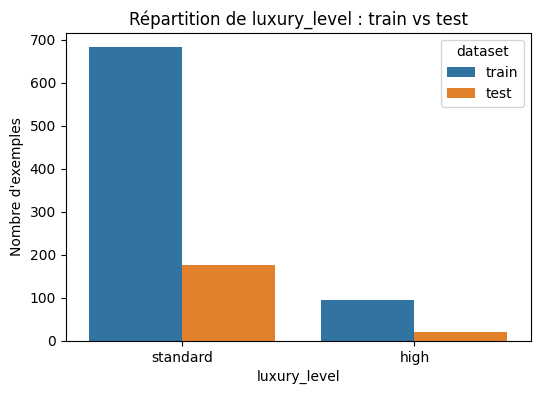

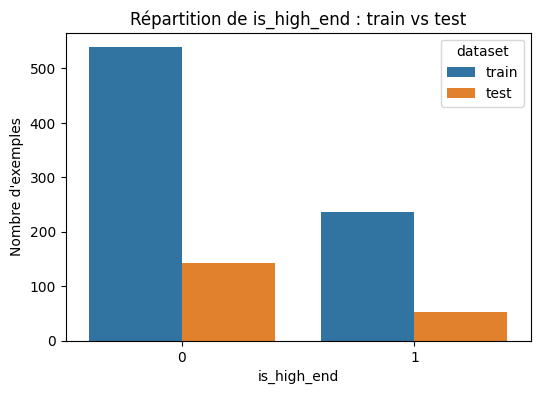

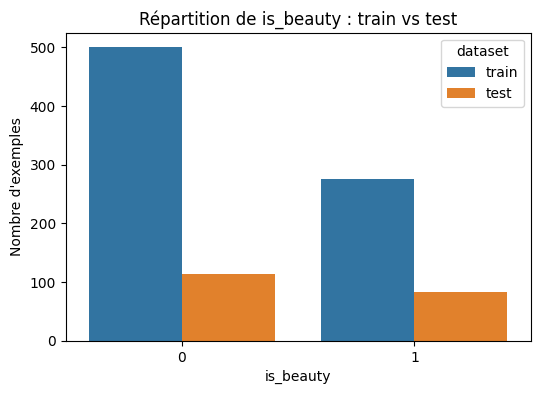

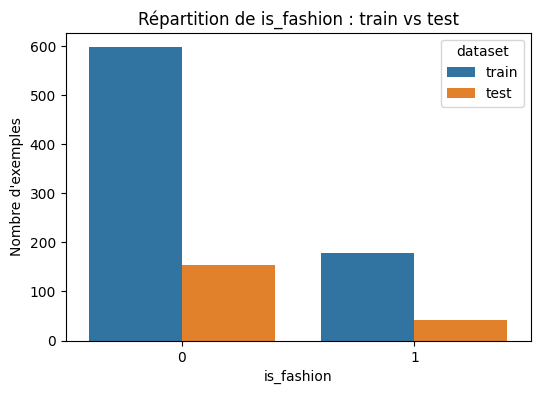

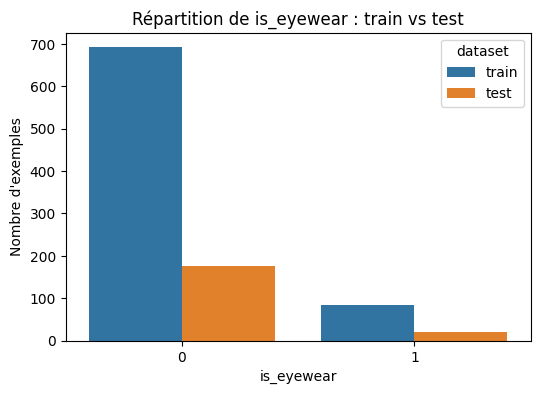

In [309]:
# Ajouter une colonne 'dataset' pour distinguer train et test
X_train_sgd['dataset'] = 'train'
X_test_sgd['dataset'] = 'test'

df_plot = pd.concat([X_train_sgd, X_test_sgd], axis=0)

for col in derived_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_plot, x=col, hue='dataset', 
                  order=df_plot[col].value_counts().index)
    plt.title(f"Répartition de {col} : train vs test")
    plt.ylabel("Nombre d'exemples")
    plt.show()



In [310]:
# On sépare en Train/test pour EUR

from sklearn.model_selection import train_test_split

# Pour la cible EUR
X_train_eur, X_test_eur, y_train_eur, y_test_eur = train_test_split(
    X_fe,
    y_eur_scaled,
    test_size=0.2,
    random_state=42
)

print('train, test split EUR:',X_train_eur.shape, X_test_eur.shape)

train, test split EUR: (776, 7) (195, 7)


-------


#### 4. Modélisation

**Choix du modèle : Régression linéaire**
Pour prédire le prix des produits Chanel, nous avons choisi la régression linéaire. Ce modèle est simple et interprétable, ce qui permet de mesurer l’influence de chaque variable sur le prix. La cible (prix) est continue et, après transformation logarithmique et standardisation, sa distribution est adaptée à une modélisation linéaire. De plus, certaines relations entre les caractéristiques (niveau de luxe, type de produit) et le prix semblent globalement linéaires, rendant la régression linéaire appropriée avant d’explorer des modèles plus complexes.

\begin{equation}
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p
\end{equation}

où :
- $\hat{y}$ : valeur prédite par le modèle  
- $x_1, x_2, \dots, x_p$ : variables/features  
- $\beta_1, \beta_2, \dots, \beta_p$ : coefficients appris par le modèle  
- $\beta_0$ : intercept (ordonnée à l'origine)

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2
\end{equation}

où :
- $y_i$ : valeur réelle  
- $\hat{y}_i$ : valeur prédite  
- $n$ : nombre d'observations

\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2}
\end{equation}

où :

- $y_i$ : valeur réelle de l'observation $i$
- $\hat{y}_i$ : valeur prédite par le modèle pour l'observation $i$
- $n$ : nombre total d'observations

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{n} \left( y_i - \hat{y}i \right)^2}{\sum{i=1}^{n} \left( y_i - \bar{y} \right)^2}
\end{equation}

où :

- $y_i$ : valeur réelle de l'observation $i$
- $\hat{y}_i$ : valeur prédite par le modèle pour l'observation $i$
- $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$ : moyenne des valeurs réelles
- $n$ : nombre total d'observations


- Entraînement du modèle : Sur les données d’entraînement.

In [313]:
from sklearn.linear_model import LinearRegression

lr_sgd = LinearRegression()
lr_sgd.fit(X_train_sgd_model, y_train_sgd)

y_train_pred = lr_sgd.predict(X_train_sgd_model)




- Évaluation :Metrics : RMSE, MAE, R²

- Visualisation : Comparer les prix prédits vs réels.

In [314]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_train = mean_squared_error(y_train_sgd, y_train_pred)
rmse_train = np.sqrt(mse_train) 
mae_train = mean_absolute_error(y_train_sgd, y_train_pred)
r2_train = r2_score(y_train_sgd, y_train_pred)

print("Performance sur le train de SGD :")
print(f"RMSE : {rmse_train:.4f}")
print(f"MAE  : {mae_train:.4f}")
print(f"R²   : {r2_train:.4f}")

Performance sur le train de SGD :
RMSE : 0.3837
MAE  : 0.3015
R²   : 0.8517


Temps entraînement : 0.0035 sec
Temps prédiction   : 0.0012 sec


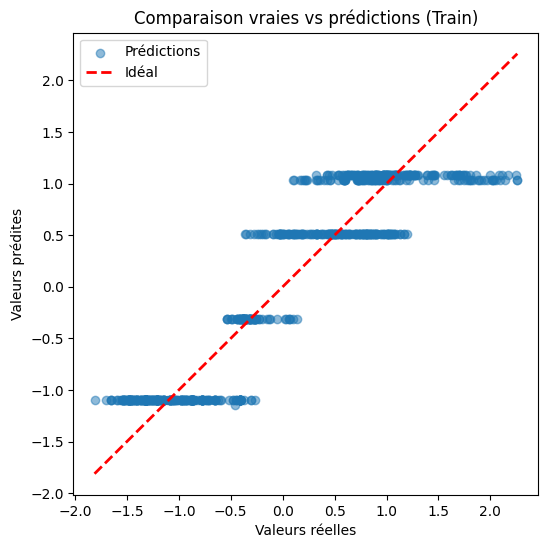

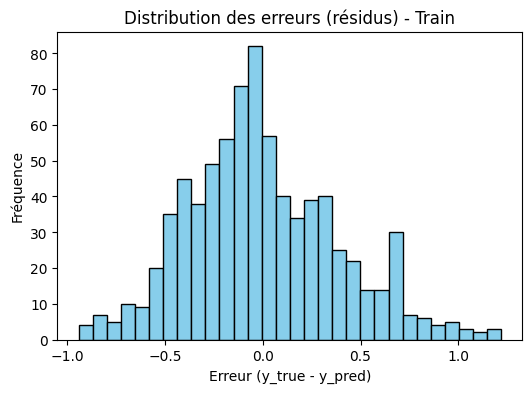

In [315]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.linear_model import LinearRegression

# --- Entraînement avec mesure du temps ---
lr_sgd = LinearRegression()

start_train = time.time()
lr_sgd.fit(X_train_sgd_model, y_train_sgd)
end_train = time.time()

start_pred = time.time()
y_train_pred = lr_sgd.predict(X_train_sgd_model)
end_pred = time.time()

train_time = end_train - start_train
pred_time = end_pred - start_pred

print(f"Temps entraînement : {train_time:.4f} sec")
print(f"Temps prédiction   : {pred_time:.4f} sec")

# --- Scatter : Vraies valeurs vs Prédictions ---
plt.figure(figsize=(6,6))
plt.scatter(y_train_sgd, y_train_pred, alpha=0.5, label="Prédictions")
plt.plot([y_train_sgd.min(), y_train_sgd.max()],
         [y_train_sgd.min(), y_train_sgd.max()],
         'r--', lw=2, label="Idéal")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison vraies vs prédictions (Train)")
plt.legend()
plt.show()

# --- Histogramme des erreurs ---
errors = y_train_sgd - y_train_pred
plt.figure(figsize=(6,4))
plt.hist(errors, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Erreur (y_true - y_pred)")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs (résidus) - Train")
plt.show()


In [316]:
print(X_train_sgd_model.describe())
print("y_train_sgd variance :", np.var(y_train_sgd))
print("y_train_pred variance :", np.var(y_train_pred))


       is_high_end   is_beauty  is_fashion  is_eyewear  luxury_level_num
count   776.000000  776.000000  776.000000  776.000000        776.000000
mean      0.305412    0.355670    0.230670    0.108247          0.121134
std       0.460879    0.479025    0.421533    0.310893          0.326493
min       0.000000    0.000000    0.000000    0.000000          0.000000
25%       0.000000    0.000000    0.000000    0.000000          0.000000
50%       0.000000    0.000000    0.000000    0.000000          0.000000
75%       1.000000    1.000000    0.000000    0.000000          0.000000
max       1.000000    1.000000    1.000000    1.000000          1.000000
y_train_sgd variance : 0.9931403214484389
y_train_pred variance : 0.8459012383098218


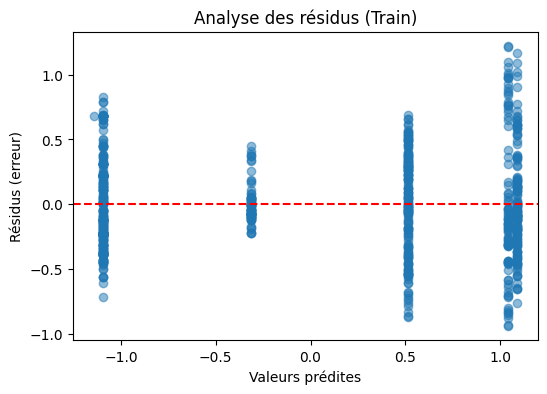

In [317]:
residuals = y_train_sgd - y_train_pred
plt.figure(figsize=(6,4))
plt.scatter(y_train_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (erreur)")
plt.title("Analyse des résidus (Train)")
plt.show()


In [318]:
# Test

start = time.time()
y_test_pred = lr_sgd.predict(X_test_sgd_model)
end = time.time()

# Métriques
mse_test = mean_squared_error(y_test_sgd, y_test_pred)
rmse_test = np.sqrt(mse_train) 
mae_test = mean_absolute_error(y_test_sgd, y_test_pred)
r2_test = r2_score(y_test_sgd, y_test_pred)

print("Performance sur le test :")
print(f"RMSE : {rmse_test:.4f}")
print(f"MAE  : {mae_test:.4f}")
print(f"R²   : {r2_test:.4f}")
print(f"Temps de prédiction : {(end-start):.4f} sec")

Performance sur le test :
RMSE : 0.3837
MAE  : 0.2989
R²   : 0.8619
Temps de prédiction : 0.0022 sec


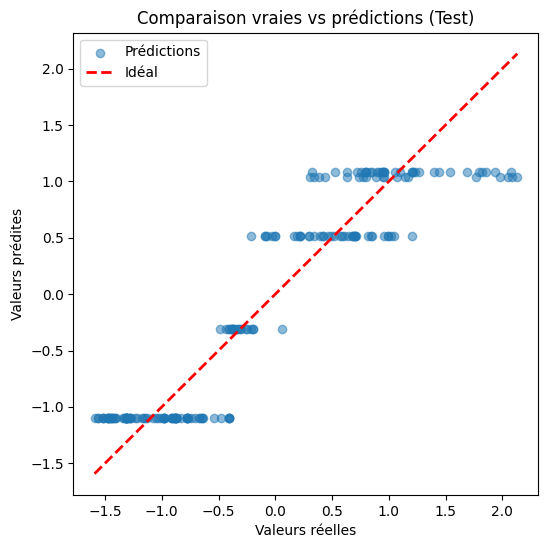

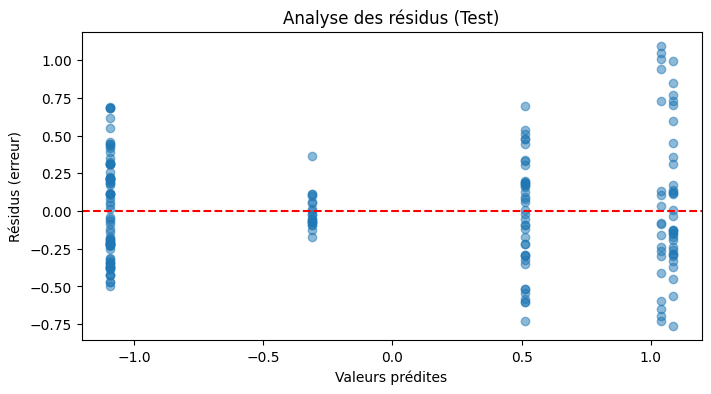

In [319]:
import matplotlib.pyplot as plt
import numpy as np

# --- Scatter : Vraies valeurs vs Prédictions ---
plt.figure(figsize=(6,6))
plt.scatter(y_test_sgd, y_test_pred, alpha=0.5, label="Prédictions")
plt.plot([y_test_sgd.min(), y_test_sgd.max()],
         [y_test_sgd.min(), y_test_sgd.max()],
         'r--', lw=2, label="Idéal")
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison vraies vs prédictions (Test)")
plt.legend()
plt.show()

# --- Résidus : Erreurs ---
residuals = y_test_sgd - y_test_pred
plt.figure(figsize=(8,4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus (erreur)")
plt.title("Analyse des résidus (Test)")
plt.show()


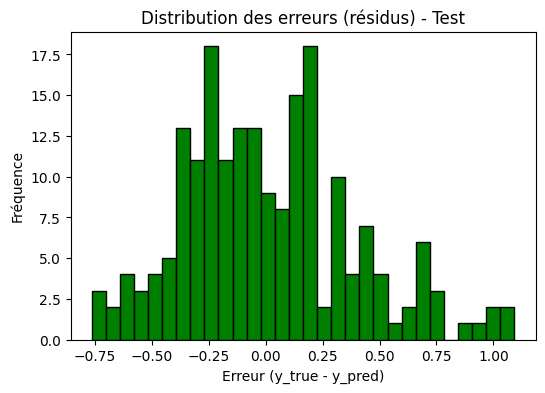

In [320]:
# --- Histogramme des erreurs ---
errors = y_test_sgd - y_test_pred
plt.figure(figsize=(6,4))
plt.hist(errors, bins=30, color="green", edgecolor="black")
plt.xlabel("Erreur (y_true - y_pred)")
plt.ylabel("Fréquence")
plt.title("Distribution des erreurs (résidus) - Test")
plt.show()

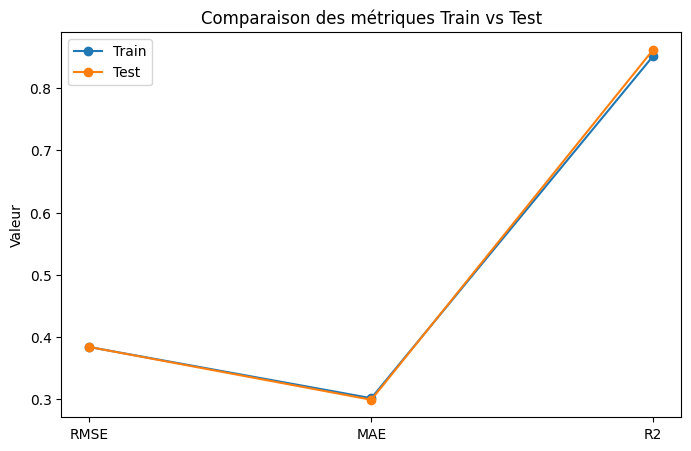

In [321]:
import matplotlib.pyplot as plt

# Erreurs sur train et test
metrics = ['RMSE', 'MAE', 'R2']
train_values = [rmse_train, mae_train, r2_train]
test_values = [rmse_test, mae_test, r2_test]

# Pour RMSE et MAE, plus bas c'est mieux ; pour R2, plus haut c'est mieux
plt.figure(figsize=(8,5))
plt.plot(metrics, train_values, marker='o', label='Train')
plt.plot(metrics, test_values, marker='o', label='Test')
plt.title("Comparaison des métriques Train vs Test")
plt.ylabel("Valeur")
plt.legend()
plt.show()


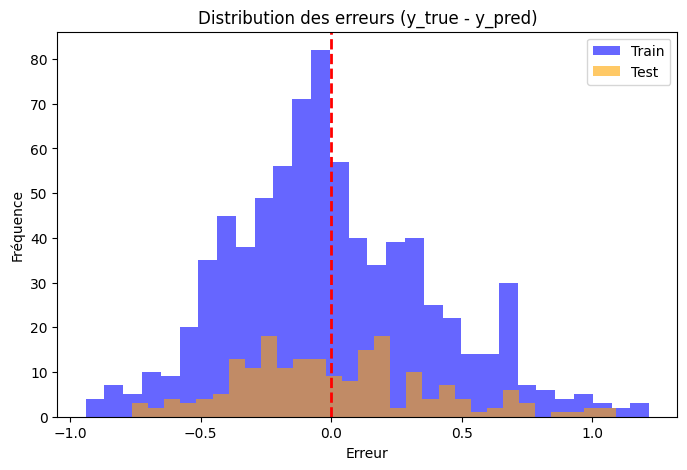

In [322]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des erreurs
errors_train = y_train_sgd.flatten() - y_train_pred.flatten()
errors_test = y_test_sgd.flatten() - y_test_pred.flatten()

plt.figure(figsize=(8,5))
plt.hist(errors_train, bins=30, alpha=0.6, label='Train', color='blue')
plt.hist(errors_test, bins=30, alpha=0.6, label='Test', color='orange')
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.title("Distribution des erreurs (y_true - y_pred)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


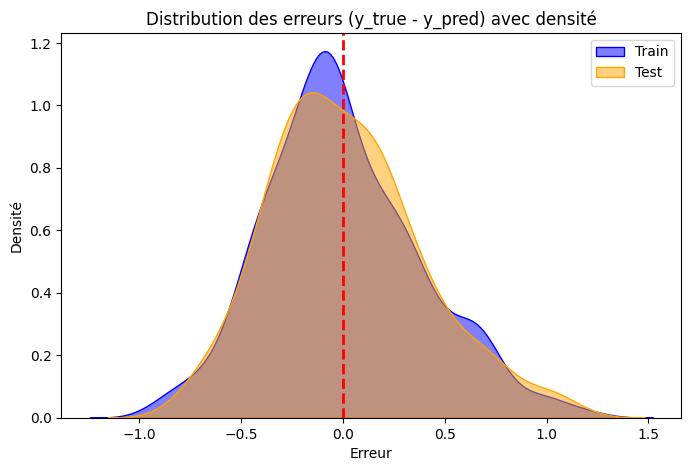

In [323]:
# Calcul des erreurs
errors_train = y_train_sgd.flatten() - y_train_pred.flatten()
errors_test = y_test_sgd.flatten() - y_test_pred.flatten()

plt.figure(figsize=(8,5))
sns.kdeplot(errors_train, fill=True, alpha=0.5, label='Train', color='blue')
sns.kdeplot(errors_test, fill=True, alpha=0.5, label='Test', color='orange')
plt.axvline(0, color='red', linestyle='--', lw=2)
plt.title("Distribution des erreurs (y_true - y_pred) avec densité")
plt.xlabel("Erreur")
plt.ylabel("Densité")
plt.legend()
plt.show()

##### Validation Croisée

pour évaluer le modèle de fçon plus robuste

In [324]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

lr_sgd = LinearRegression()

cv_results = cross_validate(
    lr_sgd,
    X_train_sgd_model,      # toutes tes features numériques
    y_train_sgd,            # cible
    cv=5,                   # nombre de folds
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    return_train_score=True
)


In [325]:
rmse_train_cv = np.sqrt(-cv_results['train_neg_mean_squared_error'])
rmse_test_cv  = np.sqrt(-cv_results['test_neg_mean_squared_error'])

mae_train_cv = -cv_results['train_neg_mean_absolute_error']
mae_test_cv  = -cv_results['test_neg_mean_absolute_error']

r2_train_cv = cv_results['train_r2']
r2_test_cv  = cv_results['test_r2']


print("RMSE train par fold :", rmse_train_cv)
print("RMSE test par fold  :", rmse_test_cv)

print("MAE train par fold  :", mae_train_cv)
print("MAE test par fold   :", mae_test_cv)

print("R² train par fold   :", r2_train_cv)
print("R² test par fold    :", r2_test_cv)


RMSE train par fold : [0.3803099  0.38753447 0.37751689 0.38727008 0.38465742]
RMSE test par fold  : [0.39898209 0.36869969 0.40799219 0.37048639 0.38148656]
MAE train par fold  : [0.29664967 0.30580854 0.29533662 0.30626995 0.30233206]
MAE test par fold   : [0.31176046 0.28803831 0.32383379 0.28707597 0.3055753 ]
R² train par fold   : [0.85114706 0.8523562  0.85379809 0.84799686 0.8542104 ]
R² test par fold    : [0.85207997 0.84839343 0.84372062 0.86528867 0.83858464]


In [326]:
for i, (rmse_t, rmse_te, mae_t, mae_te, r2_t, r2_te) in enumerate(zip(
        rmse_train_cv, rmse_test_cv, mae_train_cv, mae_test_cv, r2_train_cv, r2_test_cv), 1):
    print(f"Fold {i}: RMSE(train)={rmse_t:.4f}, RMSE(test)={rmse_te:.4f}, "
          f"MAE(train)={mae_t:.4f}, MAE(test)={mae_te:.4f}, "
          f"R²(train)={r2_t:.4f}, R²(test)={r2_te:.4f}")


Fold 1: RMSE(train)=0.3803, RMSE(test)=0.3990, MAE(train)=0.2966, MAE(test)=0.3118, R²(train)=0.8511, R²(test)=0.8521
Fold 2: RMSE(train)=0.3875, RMSE(test)=0.3687, MAE(train)=0.3058, MAE(test)=0.2880, R²(train)=0.8524, R²(test)=0.8484
Fold 3: RMSE(train)=0.3775, RMSE(test)=0.4080, MAE(train)=0.2953, MAE(test)=0.3238, R²(train)=0.8538, R²(test)=0.8437
Fold 4: RMSE(train)=0.3873, RMSE(test)=0.3705, MAE(train)=0.3063, MAE(test)=0.2871, R²(train)=0.8480, R²(test)=0.8653
Fold 5: RMSE(train)=0.3847, RMSE(test)=0.3815, MAE(train)=0.3023, MAE(test)=0.3056, R²(train)=0.8542, R²(test)=0.8386


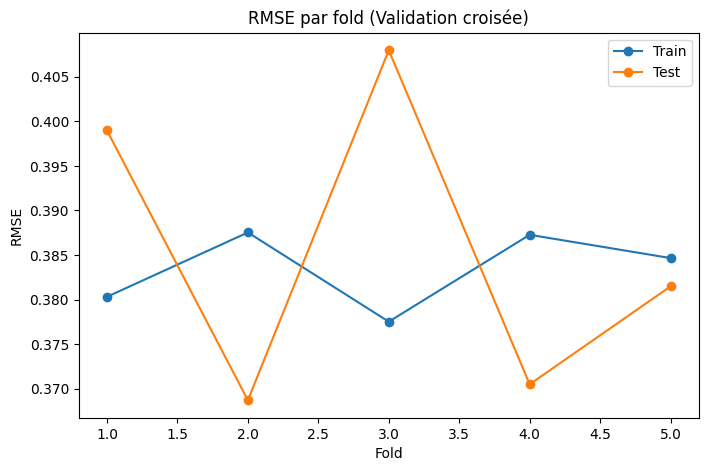

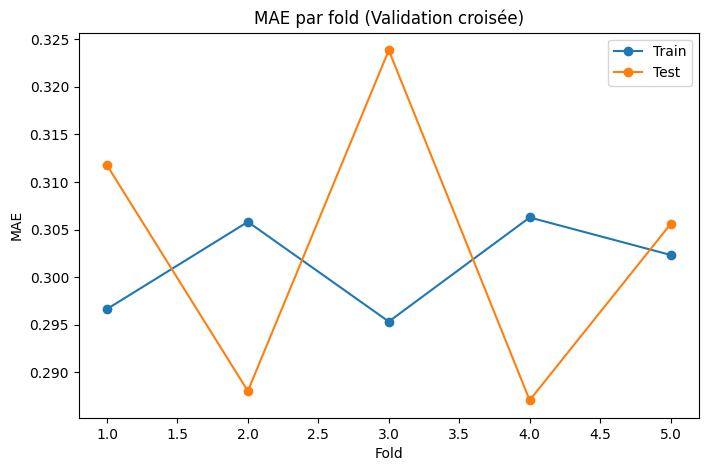

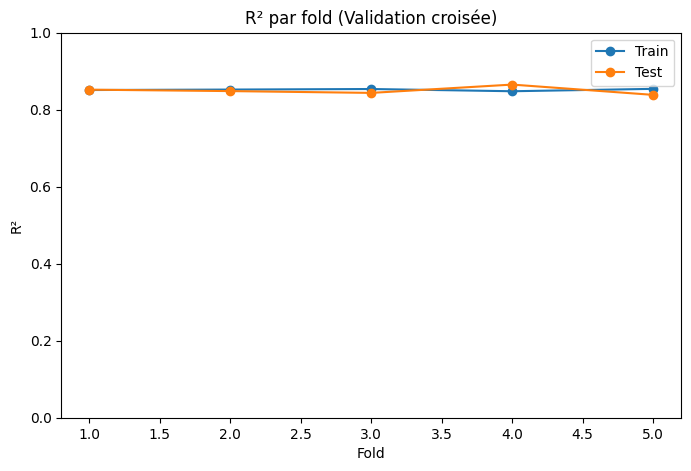

In [327]:
folds = np.arange(1, len(rmse_train_cv)+1)

# --- Graphique RMSE ---
plt.figure(figsize=(8,5))
plt.plot(folds, rmse_train_cv, marker='o', label='Train')
plt.plot(folds, rmse_test_cv, marker='o', label='Test')
plt.title("RMSE par fold (Validation croisée)")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.legend()
plt.show()

# --- Graphique MAE ---
plt.figure(figsize=(8,5))
plt.plot(folds, mae_train_cv, marker='o', label='Train')
plt.plot(folds, mae_test_cv, marker='o', label='Test')
plt.title("MAE par fold (Validation croisée)")
plt.xlabel("Fold")
plt.ylabel("MAE")
plt.legend()
plt.show()

# --- Graphique R² ---
plt.figure(figsize=(8,5))
plt.plot(folds, r2_train_cv, marker='o', label='Train')
plt.plot(folds, r2_test_cv, marker='o', label='Test')
plt.title("R² par fold (Validation croisée)")
plt.xlabel("Fold")
plt.ylabel("R²")
plt.ylim(0, 1)
plt.legend()
plt.show()

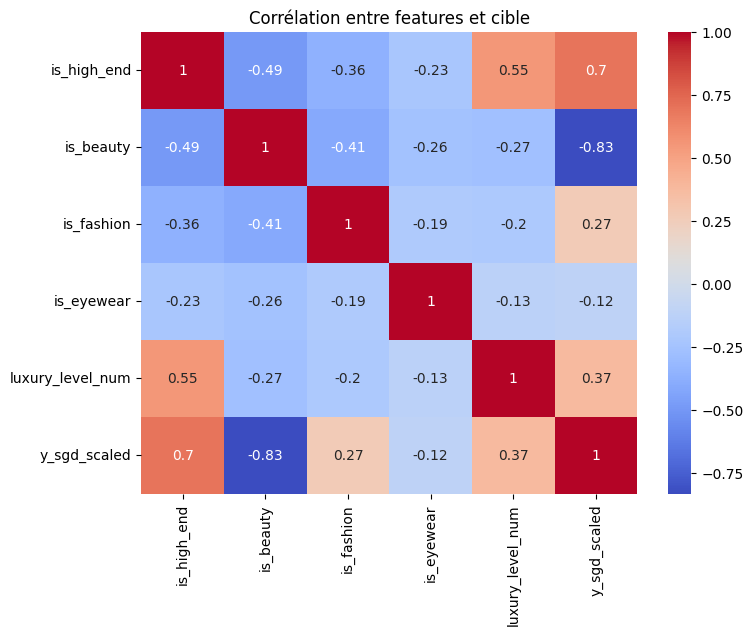

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concaténation des features et de la cible
df_corr = X_train_sgd_model.copy()
df_corr['y_sgd_scaled'] = y_train_sgd

# Matrice de corrélation
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre features et cible")
plt.show()


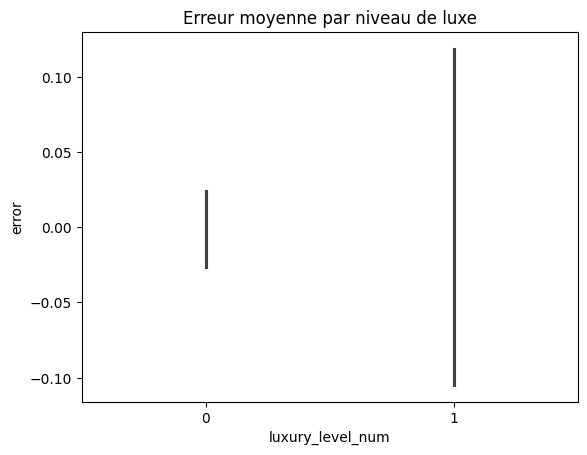

In [329]:
import numpy as np

# Erreur
errors = y_train_sgd - y_train_pred

# Ajouter aux features
df_errors = X_train_sgd_model.copy()
df_errors['error'] = errors

# Par exemple, moyenne des erreurs par 'luxury_level_num'
sns.barplot(x='luxury_level_num', y='error', data=df_errors)
plt.title("Erreur moyenne par niveau de luxe")
plt.show()


#### 6. Discussion

Résultats obtenus et interprétation.

Limites du modèle :
Exemple : la régression linéaire peut être trop simple pour capturer toutes les nuances d’un produit de luxe.

Idées pour améliorer le projet :
Ajouter plus de features (année de lancement, popularité, matériaux).
Essayer des modèles plus complexes (Random Forest, XGBoost).

#### Amélioration du modèle (optionnel pour aller plus loin)

Tester une régression polynomiale ou un Ridge/Lasso pour voir si la performance s’améliore.

Analyser l’importance des features pour voir ce qui influence le prix le plus.